In [1]:
pip install yahoo_fin --upgrade

Note: you may need to restart the kernel to use updated packages.


In [99]:
pip install pydataset

     ---------------------------------------- 15.9/15.9 MB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939417 sha256=053d51be3a249f71e2f0f20bea0586c67688e3c5e6110c44e8c5f7d7cd52816a
  Stored in directory: c:\users\nelcy\appdata\local\pip\cache\wheels\2b\83\5c\073c3755e8b7704e4677557b2055e61026c1a2342149214c13
Successfully built pydataset
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install requests_html

Note: you may need to restart the kernel to use updated packages.


In [113]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


# Importo librias 

In [133]:
from yahoo_fin.stock_info import get_data

In [18]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from   matplotlib import style
style.use('ggplot')

In [79]:
 nvidia = get_data("NVDA", start_date = "2018-01-1", end_date ="2023-09-7",index_as_date = True, interval="1d")

In [80]:
nvidia.head()

,open,high,low,close,adjclose,volume,ticker
2018-01-02,48.945000,49.875000,48.625000,49.837502,49.317120,35561600,NVDA
2018-01-03,51.025002,53.424999,50.937500,53.117500,52.562870,91470400,NVDA
2018-01-04,53.939999,54.512501,53.172501,53.397499,52.839954,58326800,NVDA
2018-01-05,53.547501,54.227501,52.770000,53.849998,53.287727,58012400,NVDA
2018-01-08,55.099998,56.250000,54.645000,55.500000,54.920498,88121600,NVDA


In [81]:
nvidia.tail()

,open,high,low,close,adjclose,volume,ticker
2023-08-30,490.440002,499.269989,484.250000,492.640015,492.599426,73520600,NVDA
2023-08-31,493.799988,497.440002,489.579987,493.549988,493.509338,52857000,NVDA
2023-09-01,497.619995,498.000000,481.420013,485.089996,485.050049,46319100,NVDA
2023-09-05,482.230011,488.510010,478.600006,485.480011,485.440033,38265300,NVDA
2023-09-06,484.410004,485.489990,465.799988,470.609985,470.609985,46867000,NVDA


In [82]:
nvidia['2020-01-01':'2023-09-1']

,open,high,low,close,adjclose,volume,ticker
2020-01-02,59.687500,59.977501,59.180000,59.977501,59.749298,23753600,NVDA
2020-01-03,58.775002,59.457500,58.525002,59.017502,58.792950,20538400,NVDA
2020-01-06,58.080002,59.317501,57.817501,59.264999,59.039509,26263600,NVDA
2020-01-07,59.549999,60.442501,59.097500,59.982498,59.754284,31485600,NVDA
2020-01-08,59.939999,60.509998,59.537498,60.095001,59.866348,27710800,NVDA
...,...,...,...,...,...,...,...
2023-08-28,464.820007,469.799988,448.880005,468.350006,468.311432,68519200,NVDA
2023-08-29,466.660004,490.809998,463.910004,487.839996,487.799805,70139700,NVDA
2023-08-30,490.440002,499.269989,484.250000,492.640015,492.599426,73520600,NVDA
2023-08-31,493.799988,497.440002,489.579987,493.549988,493.509338,52857000,NVDA


In [94]:
# valores de nvidia 2022-9-1
nvidia.loc["2022-9-1"]

open        142.089996
high        143.800003
low         132.699997
close       139.369995
adjclose    139.243423
volume       117886500
ticker            NVDA
Name: 2022-09-01 00:00:00, dtype: object

In [91]:
# Costo de la accion cuando cerro el mercado
nvidia["adjclose"]["2023-9-1"]

485.050048828125

In [ ]:
#cada trimestre
 t_nvidia = nvidia.asfreq('BQ')

# Graficamos

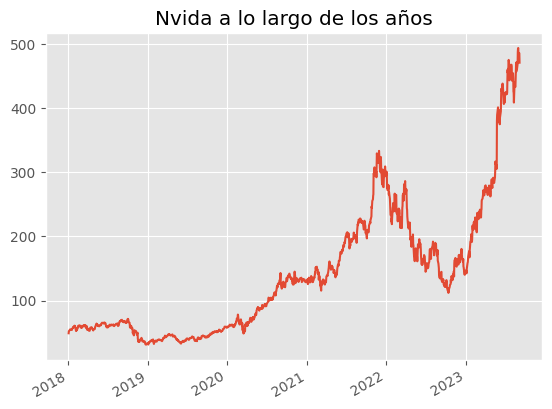

In [104]:
nvidia['adjclose'].plot()
plt.title('Nvida a lo largo de los años')
plt.show()

In [107]:
desplazado = nvidia['adjclose'].shift(1)
desplazado[:5]

2018-01-02          NaN
2018-01-03    49.317120
2018-01-04    52.562870
2018-01-05    52.839954
2018-01-08    53.287727
Name: adjclose, dtype: float64

In [116]:
# calculando el porcentaje de variación del día.
nvidia['adjclose'].pct_change()[:5]

2018-01-02         NaN
2018-01-03    0.065814
2018-01-04    0.005271
2018-01-05    0.008474
2018-01-08    0.030641
Name: adjclose, dtype: float64

In [119]:
import statsmodels.api as sm 
nvidia_ciclo, nvidia_tend = sm.tsa.filters.hpfilter(nvidia['adjclose'])
nvidia['tend'] = nvidia_tend

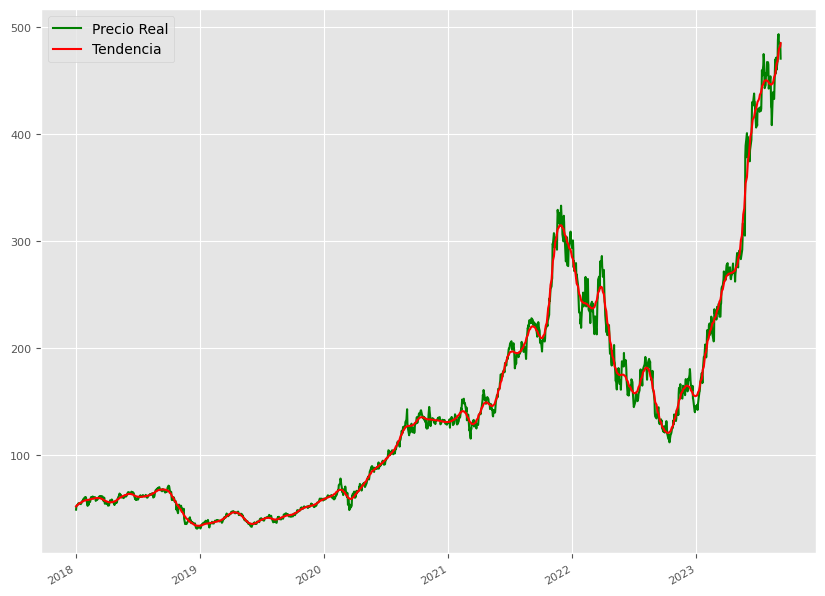

In [150]:
fig, ax = plt.subplots(figsize=(10, 8))
nvidia['adjclose'].plot(ax=ax, color='green', label='Precio Real', fontsize=8)
nvidia['tend'].plot(ax=ax, color='red', label='Tendencia', fontsize=8)

legend = ax.legend()
legend.prop.set_size(8)

plt.show()
fig.savefig('grafica_descomposicion.png')

# Pronosticando la serie con ARIMA

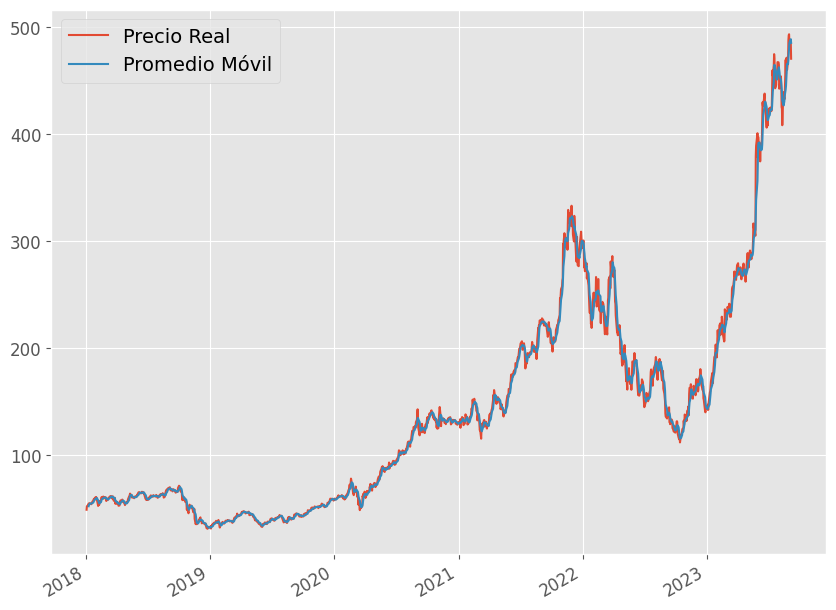

In [138]:
# Calculando promedios móviles cada 5 días
nvidia['prod_mov'] = nvidia['adjclose'].rolling(window=5).mean()

# Creando un gráfico de variación del precio real con el promedio móvil
fig, ax = plt.subplots(figsize=(10, 8))
nvidia[['adjclose', 'prod_mov']].plot(ax=ax, fontsize=12)


legend = ax.legend(['Precio Real', 'Promedio Móvil'], fontsize=14)
plt.show()
